# REGRESIÓN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source

## EJEMPLO 1: REGRESIÓN LINEAL

Vamos a generar unos datos de aspecto lineal (y=4 + 3x) con un poco de ruido

In [138]:
np.random.seed(42)
m = 100  
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1)

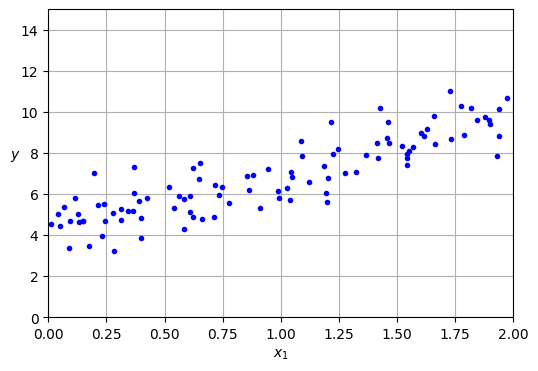

In [139]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

### LinearRegression

In [140]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

En vez de 4 y 3 (y=4+3x) debibo al error hemos obtenido 4.215 y 2.770 que se acerca bastante.

Vamos a hacer alguna predicción

In [141]:
X_new = np.array([[0], [2]])
y_predict=lin_reg.predict(X_new)
y_predict

array([[4.21509616],
       [9.75532293]])

Veamos el resultado gráficamente

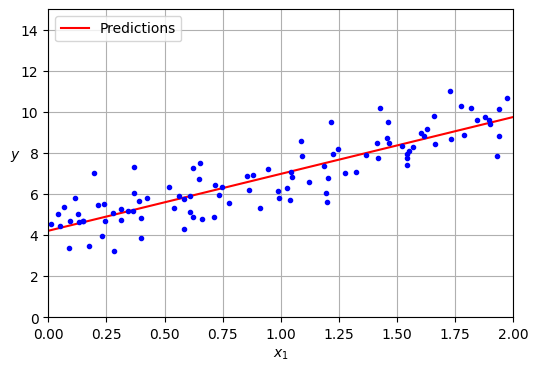

In [142]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

Aunque hemos visto el resultado gráficamente vamos a calcular el error en el conjunto de entrenamiento (RSME).

In [143]:
y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
#Otra forma de hallar rmse
#rmse1=root_mean_squared_error(y, y_pred)
y_min=np.min(y)
y_max=np.max(y)
print("Y min:",y_min)
print("Y max:",y_max)
print("RMSE:", rmse)
#print("RMSE1:",rmse1)

Y min: 3.2380621152873488
Y max: 11.044395066398318
RMSE: 0.8981005311027564


### SGDRegressor (descenso del gradiente estocástico)

El modelo se ejecuta durante un máximo de 1.000 repeticiones (max_iter) o hasta que la pérdida se reduzca en menos de 1e-5 (tol) durante 100 repeticiones (n_iter_no_change). No utiliza ninguna regularización (penalty=None) y la tasa de aprendizaje inicial es 0.01

In [144]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, n_iter_no_change=100, penalty=None, eta0=0.01,  random_state=42)
sgd_reg.fit(X, y.flatten())  # y.flatten() porque fit() espera un vector 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [145]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [146]:
y_pred = sgd_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse)

Y min: 3.2380621152873488
Y max: 11.044395066398318
RMSE: 0.8981018481577449


### LinearSVR

In [147]:
svr_reg = LinearSVR(epsilon=0.5, random_state=42)
svr_reg.fit(X, y.flatten())

LinearSVR(epsilon=0.5, random_state=42)

In [148]:
svr_reg.intercept_, svr_reg.coef_

(array([4.02740704]), array([2.86270582]))

In [149]:
y_pred = svr_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse)

Y min: 3.2380621152873488
Y max: 11.044395066398318
RMSE: 0.9053802048583451


## EJEMPLO 2: REGRESIÓN POLINOMIAL

Primero, generamos datos no lineales, basados en una ecuación de segundo grado simple (que es una ecuación con la forma y = ax2 + bx + c) y algo de ruido

In [150]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

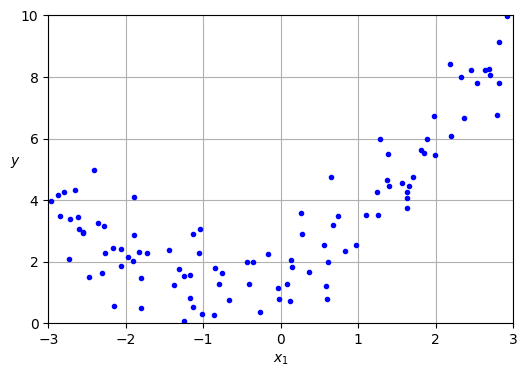

In [151]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Está claro que una línea recta nunca se ajustará a estos datos de forma adecuada. 

Vamos a utilizar la clase PolynomialFeatures de Scikit-Learn para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una característica nueva (en este caso, solo hay una característica). 

In [152]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [153]:
X_poly[0]

array([-0.75275929,  0.56664654])

Ya podemos ajustar un modelo LinearRegression a este conjunto de datos ampliado:

In [154]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Mejor todo en una pipeline

In [155]:
polinomial_modelo = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
polinomial_modelo.fit(X, y)
polinomial_modelo.named_steps['linearregression'].intercept_, polinomial_modelo.named_steps['linearregression'].coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

No está mal: el modelo estima $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$ cuando, en realidad, la función original era $y = 0.5x_1^2 + 1.0x_1 + 2 + \text{ruido gaussiano}$.

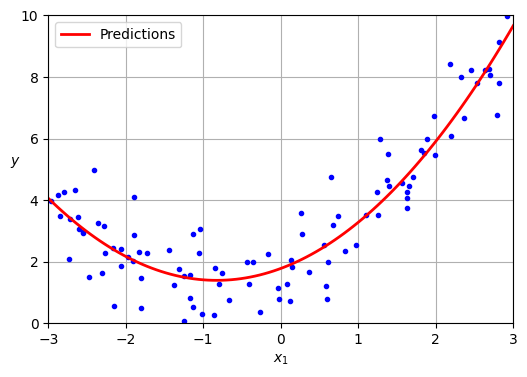

In [156]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = polinomial_modelo.predict(X_new)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [157]:
y_pred = polinomial_modelo.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse)

Y min: 0.06839478730021198
Y max: 9.970204493960663
RMSE: 0.8815858814376717


Un punto clave en la regresión polinomica es determinar el valor del hiperparamatro degree:
- Con un degree bajo puede que nuestro modelo subajuste
- Con un degree alto puedo que nuestro modelo sobreajuste

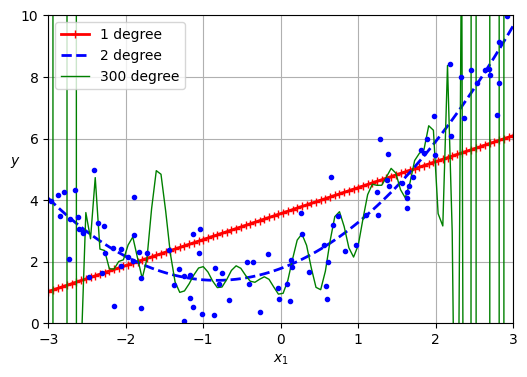

In [158]:
plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = "{} degree".format(degree)
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### CURVAS DE APRENDIZAJE

Una forma de elegir el degree es usando las curvas de aprendizaje: gráficos del error de entrenamiento y el error de validación, hay que evaluar el modelo en intervalos regulares durante el entrenamiento tanto en el conjunto de entrenamiento como en el de validación, y trazar el gráfico con los resultados.

Scikit-Learn tiene una función learning_curve() muy útil para ayudar con esto: entrena y evalúa el modelo utilizando la validación cruzada.

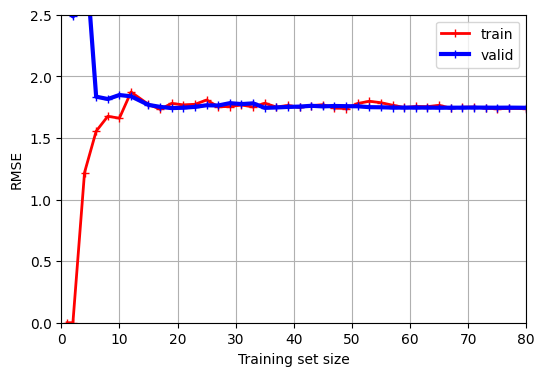

In [160]:
# train_sizes=np.linspace(0.01, 1.0, 40) - Divide el conjunto de entrenamiento en 40 trocitos equidistantes
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
# La función devuelve los tamaños del conjunto de entrenamiento en los que ha evaluado el modelo y las puntuaciones de entrenamiento y validación que ha medido para cada tamaño y para cada iteración de la validación cruzada
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4)) 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-+", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

Estas curvas de aprendizaje son típicas de un modelo que está subajustando. Ambas curvas han llegado a una meseta; están cerca y bastante elevadas. 

Ahora vamos a fijarnos en las curvas de aprendizaje de un modelo polinomial de décimo grado con los mismos datos.

In [115]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

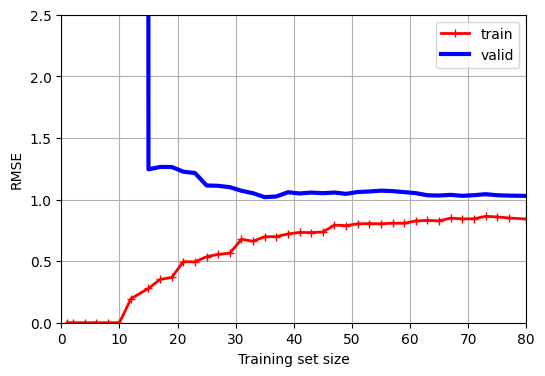

In [116]:
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

Hay un espacio entre las curvas. Eso significa que el modelo tiene un rendimiento bastante mejor en los datos de entrenamiento que en los de validación, lo cual es una marca distintiva de un modelo que sobreajusta.

Vamos a ver ahora que pasa con grado 2

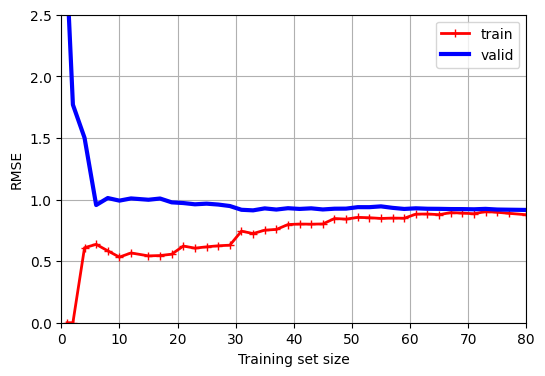

In [117]:
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

En la gráfica podemos ver que grado 2 es más adecuado la diferencia entre entrenamiento y validación es mínima (la de entrenamiento es menor, lo cual es lo lógico) pero el error es más bajo que sin usar el modelo polinomial.

## EJEMPLO 3: REGULARIZACIÓN

Una buena forma de reducir el sobreajuste es regularizar el modelo 

Vamos a crear unos datos de prueba

In [161]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 
y = (0.1 * X**5 + 0.5 * X**4 - X**3 + X**2 + 2 * X + np.random.randn(m, 1) * 5)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

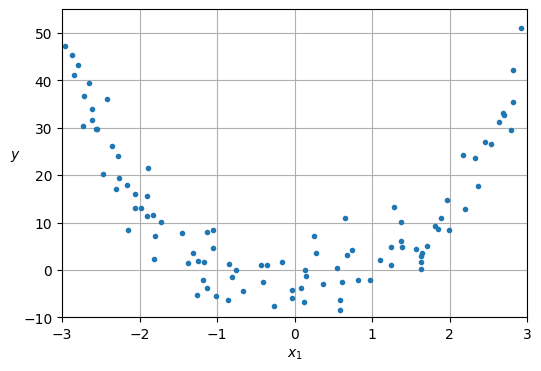

In [162]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([-3, 3, -10, 55])
plt.grid()
plt.show()

In [163]:
poly_features = PolynomialFeatures(degree=30, include_bias=False)
lin_reg = LinearRegression()
pipeline_lin = make_pipeline(poly_features, lin_reg)
pipeline_lin.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=30, include_bias=False)),
                ('linearregression', LinearRegression())])

In [164]:
y_pred_lin = pipeline_lin.predict(X)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_lin)

Y min: -8.542299598188182
Y max: 51.04690761850233
RMSE: 5.923888919433624


### REGRESIÓN DE RIDGE (L2)

El hiperparámetro α controla cuánto queremos regularizar el modelo. Si α=0, entonces no hay regularización. Si α es muy grande, entonces todos los pesos acaban muy cerca de cero y el resultado es una línea plana que cruza la media de los datos.

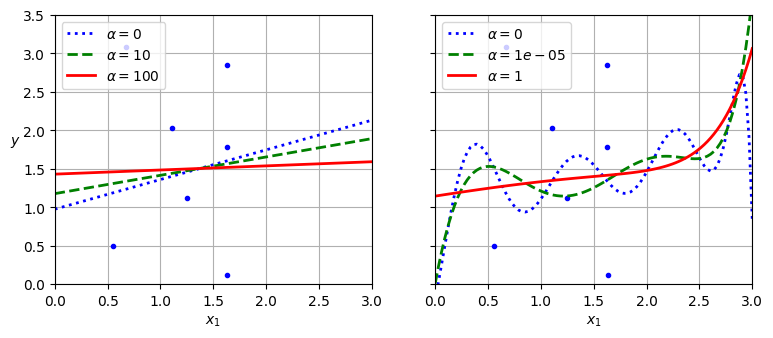

In [165]:
np.random.seed(42)
m = 20
X_dib = 3 * np.random.rand(m, 1)
y_dib = 1 + 0.5 * X_dib + np.random.randn(m, 1) / 1.5
X_dib_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X_dib, y_dib)
        y_new_regul = model.predict(X_dib_new)
        plt.plot(X_dib_new, y_new_regul, style, linewidth=2,  label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Vamos a aplicar la regresión de Ridge a nuestros datos

In [123]:
poly_features = PolynomialFeatures(degree=30, include_bias=False)
ridge_reg = Ridge(alpha=1.,random_state=42)
pipeline_ridge = make_pipeline(poly_features, ridge_reg)
pipeline_ridge.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=30, include_bias=False)),
                ('ridge', Ridge(random_state=42))])

In [124]:
y_pred_ridge = pipeline_ridge.predict(X)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_ridge)

Y min: -8.542299598188182
Y max: 51.04690761850233
RMSE: 4.062002115289817


RMSE regresion lineal: 5.923888919433624
RMSE ridge: 4.062002115289817


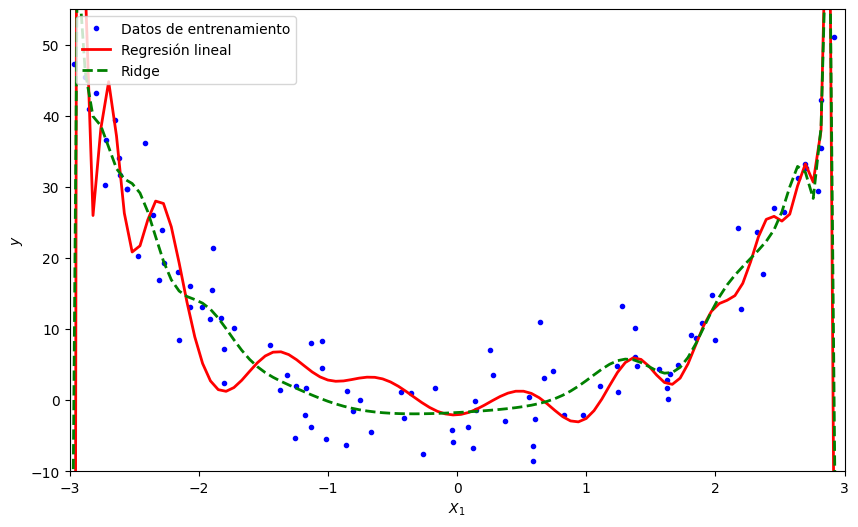

In [125]:
print(f"RMSE regresion lineal: {rmse_lin}")
print(f"RMSE ridge: {rmse_ridge}")

y_pred_lin1 = pipeline_lin.predict(X_new)
y_pred_ridge1 = pipeline_ridge.predict(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Datos de entrenamiento")
plt.plot(X_new, y_pred_lin1, "r-", linewidth=2, label="Regresión lineal")
plt.plot(X_new, y_pred_ridge1, "g--", linewidth=2, label="Ridge")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 55])
plt.show()

### REGRESIÓN DE LASSO (L1)

La regresión Lasso es otra versión regularizada de la regresión lineal. 

El hiperparámetro α también controla cuánto queremos regularizar el modelo. Si α=0, entonces no hay regularización. Si α es muy grande, entonces todos los pesos acaban muy cerca de cero y el resultado es una línea plana que cruza la media de los datos.

Una característica importante de la regresión Lasso es que tiende a eliminar los pesos de las características menos importantes (es decir, los pone a cero).

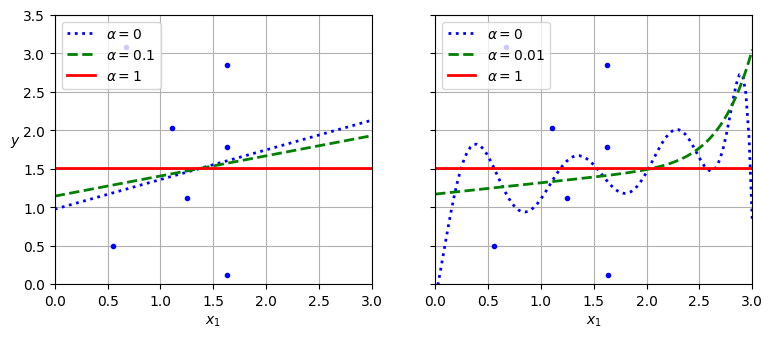

In [126]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Vamos a aplicar la regresión de Lasso a nuestros datos

In [127]:
poly_features = PolynomialFeatures(degree=30, include_bias=False)
lasso_reg = Lasso(alpha=1.,random_state=42)
pipeline_lasso = make_pipeline(poly_features, lasso_reg)
pipeline_lasso.fit(X, y)

/opt/anaconda3/envs/sapa/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+03, tolerance: 2.194e+00
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=30, include_bias=False)),
                ('lasso', Lasso(random_state=42))])

In [128]:
y_pred_lasso = pipeline_lasso.predict(X)
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_lasso)

Y min: -8.542299598188182
Y max: 51.04690761850233
RMSE: 4.375377943416326


RMSE regresion lineal: 5.923888919433624
RMSE ridge: 4.375377943416326


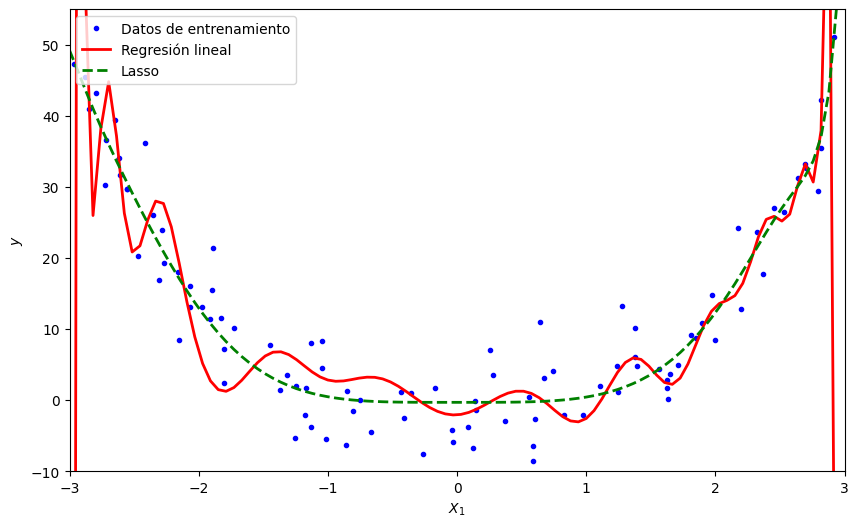

In [129]:
print(f"RMSE regresion lineal: {rmse_lin}")
print(f"RMSE ridge: {rmse_lasso}")

y_pred_lin1 = pipeline_lin.predict(X_new)
y_pred_lasso1 = pipeline_lasso.predict(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Datos de entrenamiento")
plt.plot(X_new, y_pred_lin1, "r-", linewidth=2, label="Regresión lineal")
plt.plot(X_new, y_pred_lasso1, "g--", linewidth=2, label="Lasso")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 55])
plt.show()

### REGRESIÓN DE RED ELÁSTIC (ELASTIC NET)

La regresión de red elástica es un punto medio entre la regresión de Ridge y la regresión Lasso. Podemos controlar la relación de mezcla con el hiperparametro l1_ratio. Cuando l1_ratio= 0, la red elástica es equivalente a la regresión de Ridge y, cuando r = 1, es equivalente a la regresión Lasso.

Vamos a aplicar Elastic net a nuestros datos

In [130]:
poly_features = PolynomialFeatures(degree=30, include_bias=False)
net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
pipeline_net = make_pipeline(poly_features, net_reg)
pipeline_net.fit(X, y)

/opt/anaconda3/envs/sapa/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.463e+02, tolerance: 2.194e+00
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=30, include_bias=False)),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [131]:
y_pred_net = pipeline_net.predict(X)
rmse_net = np.sqrt(mean_squared_error(y, y_pred_net))
y_min = np.min(y)
y_max = np.max(y)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_net)

Y min: -8.542299598188182
Y max: 51.04690761850233
RMSE: 4.299682525205398


RMSE regresion lineal: 5.923888919433624
RMSE elastic net: 4.299682525205398


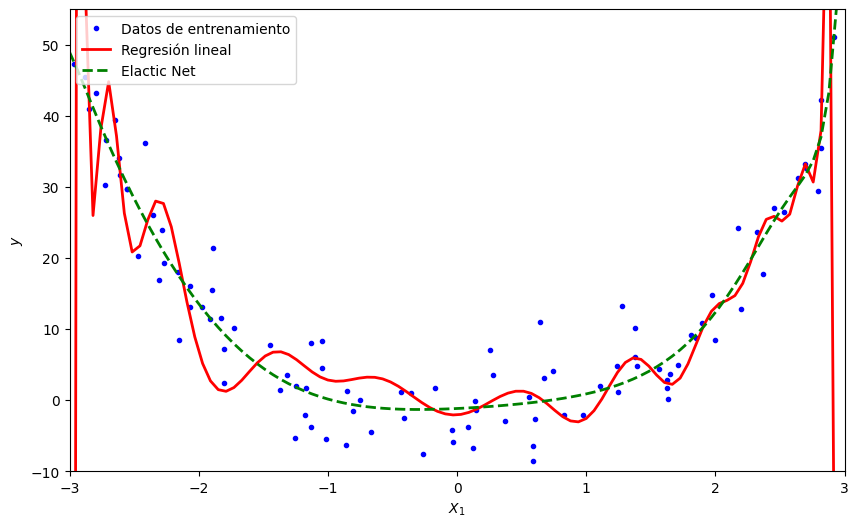

In [132]:
print(f"RMSE regresion lineal: {rmse_lin}")
print(f"RMSE elastic net: {rmse_net}")

y_pred_lin1 = pipeline_lin.predict(X_new)
y_pred_net1 = pipeline_net.predict(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Datos de entrenamiento")
plt.plot(X_new, y_pred_lin1, "r-", linewidth=2, label="Regresión lineal")
plt.plot(X_new, y_pred_net1, "g--", linewidth=2, label="Elactic Net")
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 55])
plt.show()

### EJEMPLO 3: ÁRBOLES DE DECISIÓN

Los árboles de decisión asumen muy pocas cosas sobre los datos de entrenamiento. Si se deja sin restricciones, la estructura del árbol se adaptará a los datos de entrenamiento, ajustándolos mucho, de hecho, sobre ajustándolos muy probablemente.

Para evitar el sobreajuste hay que configurar correctamente sus hiperparametros:
-	max_depth: restringe la profundidad máxima del árbol. Su valor por defecto es None, es decir sin límites.
-	max_features: restringe el número máximo de características que se evalúan para dividir en cada nodo.
-	max_leaf_nodes: restringe el número máximo de nodos terminales.
-	min_samples_split: restringe el número mínimo de muestras que debe tener un nodo antes de poder dividirse.
-	min_samples_leaf: restringe el número mínimo de muestras que debe tener un nodo terminal para crearse.
-	min_weight_fraction_leaf: igual que min_samples_leaf, pero expresado como una fracción del número total de instancias ponderadas.

Vamos a crear un árbol de regresión con la clase DecisionTreeRegressor de Scikit-Learn, entrenándolo con un conjunto de datos cuadrático con ruido con max_depth=2

Creamos los datos

In [133]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

In [134]:
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

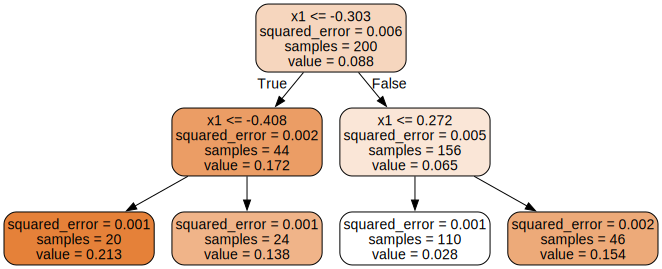

In [167]:
export_graphviz(
    tree_reg2,
    out_file=str("Recursos/regression_tree2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True,
)
Source.from_file("Recursos/regression_tree2.dot")

In [168]:
y_pred_2 = tree_reg2.predict(X_quad)
rmse_2 = np.sqrt(mean_squared_error(y_quad, y_pred_2))
y_min = np.min(y_quad)
y_max = np.max(y_quad)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_2)

Y min: -0.036827231949855314
Y max: 0.28599700903282016
RMSE: 0.03525813914470965


In [169]:
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg3.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

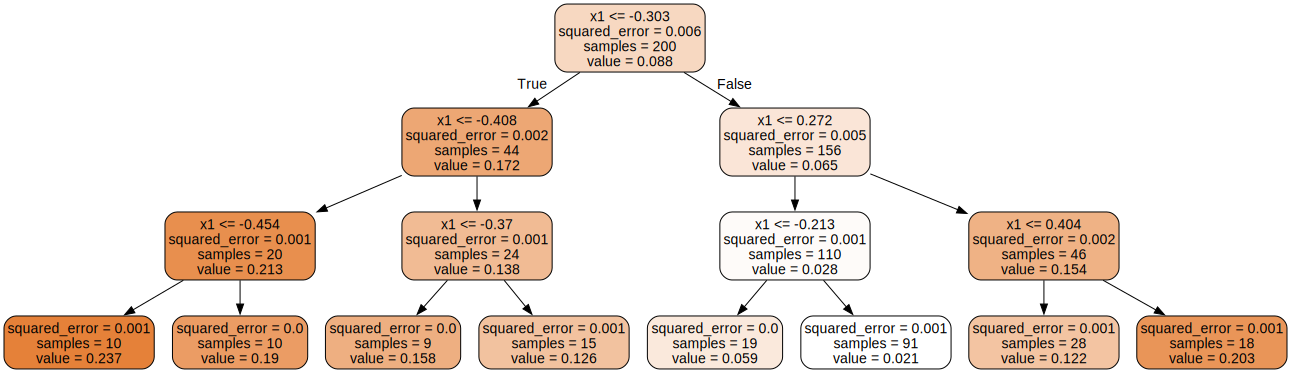

In [170]:
export_graphviz(
    tree_reg3,
    out_file=str("Recursos/regression_tree3.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True,
)
Source.from_file("Recursos/regression_tree3.dot")

In [288]:
y_pred_3 = tree_reg3.predict(X_quad)
rmse_3 = np.sqrt(mean_squared_error(y_quad, y_pred_3))
y_min = np.min(y_quad)
y_max = np.max(y_quad)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_3)

Y min: -0.036827231949855314
Y max: 0.28599700903282016
RMSE: 0.026291731890975657


In [290]:
tree_reg_min_leaf = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg_min_leaf.fit(X_quad, y_quad)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

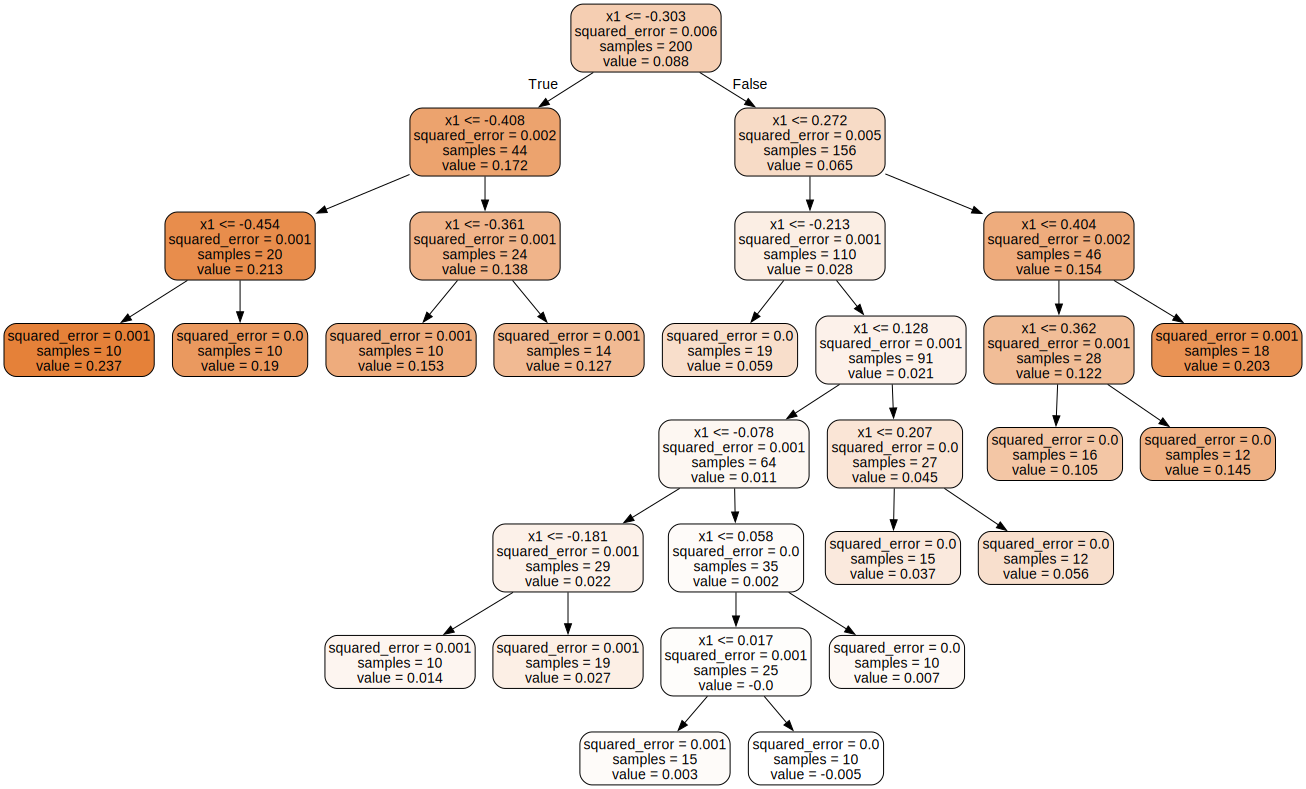

In [292]:
export_graphviz(
    tree_reg_min_leaf,
    out_file=str("Recursos/regression_tree_min_leaf.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True,
)
Source.from_file("Recursos/regression_tree_min_leaf.dot")

In [294]:
y_pred_reg_min_leaf = tree_reg_min_leaf.predict(X_quad)
rmse_reg_min_lead = np.sqrt(mean_squared_error(y_quad, y_pred_reg_min_leaf))
y_min = np.min(y_quad)
y_max = np.max(y_quad)
print("Y min:", y_min)
print("Y max:", y_max)
print("RMSE:", rmse_reg_min_lead)

Y min: -0.036827231949855314
Y max: 0.28599700903282016
RMSE: 0.021930076092116585


El principal problema con los árboles de decisión es que tienen una varianza bastante alta: cambios pequeños en los hiperparámetros o los datos pueden producir modelos muy diferentes. 